In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [70]:
pd.options.display.float_format = "{:,.2f}".format

In [92]:
step_names = ['Check_in', 'Refine_complaint', 'Exam', 'Follow_up', 'Checkout']

In [71]:
covid122 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid122_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid132 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid132_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid222 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid222_BunchedPoisson130_10kSims.csv', index_col = 0).T
covid232 = pd.read_csv('Results of sims/Sims/200524_5stepsLunch_0.05Covid232_BunchedPoisson130_10kSims.csv', index_col = 0).T

In [72]:
covid122['Staff_Type'] = '1-2-2'
covid132['Staff_Type'] = '1-3-2'
covid222['Staff_Type'] = '2-2-2'
covid232['Staff_Type'] = '2-3-2'
covid122['VarLevel'] = 'High'
covid132['VarLevel'] = 'High'
covid222['VarLevel'] = 'High'
covid232['VarLevel'] = 'High'

In [73]:
covid122low = pd.read_csv('Results of sims/Sims/200525_5stepsLunch_0.05Covid122lowVar_BunchedPoisson130_5kSims.csv', index_col = 0).T
covid132low = pd.read_csv('Results of sims/Sims/200525_5stepsLunch_0.05Covid132lowVar_BunchedPoisson130_5kSims.csv', index_col = 0).T
covid222low = pd.read_csv('Results of sims/Sims/200525_5stepsLunch_0.05Covid222lowVar_BunchedPoisson130_5kSims.csv', index_col = 0).T
covid232low = pd.read_csv('Results of sims/Sims/200525_5stepsLunch_0.05Covid232lowVar_BunchedPoisson130_5kSims.csv', index_col = 0).T

In [74]:
covid122low['Staff_Type'] = '1-2-2'
covid132low['Staff_Type'] = '1-3-2'
covid222low['Staff_Type'] = '2-2-2'
covid232low['Staff_Type'] = '2-3-2'
covid122low['VarLevel'] = 'Low'
covid132low['VarLevel'] = 'Low'
covid222low['VarLevel'] = 'Low'
covid232low['VarLevel'] = 'Low'

In [75]:
covid = pd.concat([covid122, covid132, covid222, covid232, covid122low, covid132low, covid222low, covid232low])

In [76]:
wait_cols = ['Mean_wait_time_check_in', 'Mean_wait_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_wait_time_follow_up', 'Mean_wait_time_checkout']
max_wait_cols = ['Max_wait_time_check_in', 'Max_wait_time_refine_complaint', 'Max_wait_time_exam', 'Max_wait_time_follow_up', 'Max_wait_time_checkout']

In [95]:
percentiles_filter = np.percentile(covid['Arrivals_check_in'], [5, 50, 95])

In [97]:
covid0595 = covid[(covid['Arrivals_check_in'] >= percentiles_filter[0])\
                  & (covid['Arrivals_check_in'] <= percentiles_filter[2])]
covid0595.shape

(55390, 41)

In [98]:
arrivals_type_var = covid0595.groupby(['Arrivals_check_in', 'Staff_Type', 'VarLevel'])[max_wait_cols].mean()
arrivals_type_var.columns = step_names

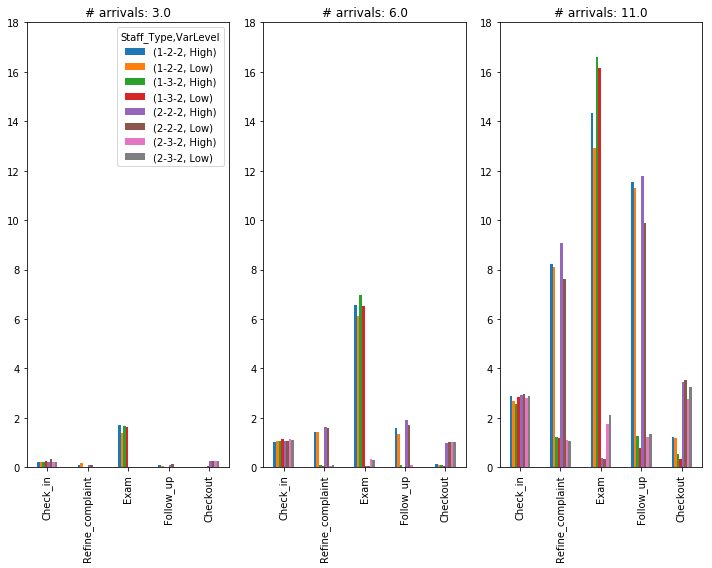

In [111]:
fig, axs = plt.subplots(ncols = 3, figsize = (10, 8))
arrivals_type_var.loc[percentiles_filter[0]].T.plot(kind = 'bar', ax = axs[0])
arrivals_type_var.loc[percentiles_filter[1]].T.plot(kind = 'bar', ax = axs[1], legend = False)
arrivals_type_var.loc[percentiles_filter[2]].T.plot(kind = 'bar', ax = axs[2], legend = False)
for i, ax in enumerate(axs) :
    ax.set_title('# arrivals: {}'.format(percentiles_filter[i]))
    ax.set_ylim(0, 18)
plt.tight_layout()
plt.show()

In [147]:
index_pairs_arrivals_staffing = list()
for i in arrivals_type_var.loc[percentiles_filter].index :
    if i[:2] in index_pairs_arrivals_staffing :
        continue
    else :
        index_pairs_arrivals_staffing.append(i[:2])

In [148]:
def abs_perc_diff(pair, data = arrivals_type_var) :
    high = data.loc[pair].loc['High']
    low = data.loc[pair].loc['Low']
    diff = high - low
    perc = diff / high
    return diff, perc

In [164]:
diffs_percs = dict()
for i in index_pairs_arrivals_staffing :
    diff, perc = abs_perc_diff(i)
    print (diff)
    print (perc)

Check_in            0.00
Refine_complaint   -0.08
Exam                0.32
Follow_up           0.05
Checkout            0.01
dtype: float64
Check_in            0.01
Refine_complaint   -0.99
Exam                0.18
Follow_up           0.58
Checkout            0.80
dtype: float64
Check_in           -0.01
Refine_complaint    0.00
Exam                0.06
Follow_up           0.00
Checkout           -0.03
dtype: float64
Check_in           -0.04
Refine_complaint     nan
Exam                0.03
Follow_up            nan
Checkout           -3.90
dtype: float64
Check_in           -0.09
Refine_complaint    0.02
Exam                0.00
Follow_up          -0.04
Checkout           -0.00
dtype: float64
Check_in           -0.41
Refine_complaint    0.18
Exam                1.00
Follow_up          -0.48
Checkout           -0.00
dtype: float64
Check_in            0.00
Refine_complaint    0.00
Exam               -0.00
Follow_up           0.00
Checkout            0.01
dtype: float64
Check_in            

In [166]:
arrivals_type_var['Total_wait'] = arrivals_type_var.sum(axis = 1)
arrivals_type_var.loc[percentiles_filter]

Check_in  Refine_complaint  Exam  \
Arrivals_check_in Staff_Type VarLevel                                     
3.00              1-2-2      High          0.21              0.08  1.71   
                             Low           0.21              0.17  1.40   
                  1-3-2      High          0.23              0.00  1.68   
                             Low           0.24              0.00  1.62   
                  2-2-2      High          0.23              0.11  0.00   
                             Low           0.32              0.09  0.00   
                  2-3-2      High          0.23              0.00  0.00   
                             Low           0.23              0.00  0.01   
6.00              1-2-2      High          1.04              1.41  6.57   
                             Low           1.05              1.43  6.10   
                  1-3-2      High          1.07              0.11  6.98   
                             Low           1.13              0.03  6.51   
                  2-2-2      High          1.08              1.64  0.06   
                             Low           1.05              1.58  0.04   
                  2-3-2      High          1.14              0.06  0.34   
                             Low           1.09              0.09  0.29   
11.00             1-2-2      High          2.87              8.24 14.32   
                             Low           2.69              8.09 12.93   
                  1-3-2      High          2.57              1.24 16.61   
                             Low           2.85              1.19 16.16   
                  2-2-2      High          2.93              9.08  0.38   
                             Low           2.96              7.62  0.32   
                  2-3-2      High          2.79              1.11  1.74   
                             Low           2.89              1.08  2.12   

                                       Follow_up  Checkout  Total_wait  
Arrivals_check_in Staff_Type VarLevel                                   
3.00              1-2-2      High           0.09      0.02        2.12  
                             Low            0.04      0.00        1.82  
                  1-3-2      High           0.00      0.01        1.92  
                             Low            0.00      0.04        1.90  
                  2-2-2      High           0.08      0.27        0.69  
                             Low            0.11      0.27        0.80  
                  2-3-2      High           0.00      0.25        0.48  
                             Low            0.00      0.24        0.47  
6.00              1-2-2      High           1.60      0.14       10.75  
                             Low            1.36      0.09       10.03  
                  1-3-2      High           0.08      0.11        8.36  
                             Low            0.03      0.07        7.77  
                  2-2-2      High           1.90      0.97        5.65  
                             Low            1.72      1.02        5.41  
                  2-3-2      High           0.10      1.04        2.68  
                             Low            0.03      1.04        2.54  
11.00             1-2-2      High          11.56      1.24       38.22  
                             Low           11.29      1.19       36.20  
                  1-3-2      High           1.26      0.52       22.20  
                             Low            0.80      0.33       21.33  
                  2-2-2      High          11.77      3.44       27.60  
                             Low            9.90      3.52       24.32  
                  2-3-2      High           1.22      2.74        9.60  
                             Low            1.36      3.27       10.72

In [172]:
total_by_staff_var = covid.groupby(['Staff_Type', 'VarLevel'])[['Total_service_time', 'Total_waiting_time']].mean()
total_by_staff_var['Total_system_time'] = total_by_staff_var.sum(axis = 1)
total_by_staff_var.columns = ['Service', 'Waiting', 'Total']
total_by_staff_var

Service  Waiting  Total
Staff_Type VarLevel                         
1-2-2      High        52.38     2.90  55.28
           Low         51.01     2.67  53.69
1-3-2      High        52.38     2.17  54.55
           Low         51.03     2.10  53.12
2-2-2      High        52.37     1.57  53.94
           Low         50.99     1.40  52.38
2-3-2      High        52.30     0.57  52.87
           Low         50.99     0.56  51.55

In [174]:
total_by_staff_var_perc = covid.groupby(['Arrivals_check_in', 'Staff_Type', 'VarLevel'])[['Total_service_time', 'Total_waiting_time']].mean()
total_by_staff_var_perc['Total_system_time'] = total_by_staff_var_perc.sum(axis = 1)
total_by_staff_var_perc.columns = ['Service', 'Waiting', 'Total']
total_by_staff_var_perc.loc[percentiles_filter]

Service  Waiting  Total
Arrivals_check_in Staff_Type VarLevel                         
3.00              1-2-2      High        52.17     0.72  52.89
                             Low         50.82     0.63  51.45
                  1-3-2      High        52.21     0.67  52.87
                             Low         51.56     0.66  52.22
                  2-2-2      High        52.00     0.23  52.23
                             Low         51.19     0.27  51.46
                  2-3-2      High        52.59     0.16  52.75
                             Low         50.82     0.16  50.99
6.00              1-2-2      High        52.38     2.20  54.58
                             Low         50.90     2.12  53.02
                  1-3-2      High        52.54     1.82  54.36
                             Low         51.06     1.69  52.74
                  2-2-2      High        52.43     1.11  53.53
                             Low         50.97     1.04  52.01
                  2-3-2      High        52.36     0.49  52.85
                             Low         50.90     0.47  51.37
11.00             1-2-2      High        52.62     6.62  59.24
                             Low         51.13     6.17  57.31
                  1-3-2      High        52.19     4.45  56.65
                             Low         51.20     4.14  55.34
                  2-2-2      High        52.31     4.51  56.82
                             Low         50.83     3.92  54.75
                  2-3-2      High        52.28     1.22  53.49
                             Low         50.76     1.34  52.11